In [3]:
import pandas as pd
import matplotlib.pyplot as plt
new_data_path = r'D:\boiler\Boiler-Preventive-Maintenance\sensor.csv'
new_data = pd.read_csv(new_data_path)
# new_data.dropna(axis=0,inplace=True)
# new_data.info()
new_data= new_data.drop(columns='sensor_15',axis=1)
new_data.dropna(axis=0, inplace=True)
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])
new_data.info()
columns = new_data.select_dtypes(include=['float64','int64']).columns
columns

<class 'pandas.core.frame.DataFrame'>
Index: 119103 entries, 0 to 143323
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      119103 non-null  int64         
 1   timestamp       119103 non-null  datetime64[ns]
 2   sensor_00       119103 non-null  float64       
 3   sensor_01       119103 non-null  float64       
 4   sensor_02       119103 non-null  float64       
 5   sensor_03       119103 non-null  float64       
 6   sensor_04       119103 non-null  float64       
 7   sensor_05       119103 non-null  float64       
 8   sensor_06       119103 non-null  float64       
 9   sensor_07       119103 non-null  float64       
 10  sensor_08       119103 non-null  float64       
 11  sensor_09       119103 non-null  float64       
 12  sensor_10       119103 non-null  float64       
 13  sensor_11       119103 non-null  float64       
 14  sensor_12       119103 non-null  float64 

Index(['Unnamed: 0', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51'],
      dtype='object')

In [41]:
Q1 = new_data[columns].quantile(0.25)
Q3 = new_data[columns].quantile(0.75)
IQR = Q3 - Q1
multiplier =1.5

lower_bound = Q1 - multiplier*IQR
upper_bound = Q3 - multiplier*IQR
outliers = ((new_data[columns]< lower_bound) | (new_data[columns]>upper_bound))
outliers = outliers.all(axis=1)
df_no_outliers = new_data[~outliers].reset_index()
x=df_no_outliers.drop(labels=['index','Unnamed: 0'],axis=1)
x

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.092010,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.708340,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.092010,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.708340,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.352430,53.21180,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.129630,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.092010,53.16840,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.840280,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.135410,53.21180,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.550930,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93196,2018-07-09 12:39:00,2.474248,45.138885,51.86632,46.440970,636.5741,85.04365,13.77315,16.03733,15.18374,...,43.48958,39.641205,42.53472,58.44907,43.981480,169.8495,53.530094,1000.0000,202.8356,NORMAL
93197,2018-07-09 12:40:00,2.476215,45.138890,51.86632,46.440971,621.7593,84.11448,13.89612,16.24711,15.45139,...,44.79166,39.641205,42.53472,57.87037,45.138890,169.8495,53.530094,1000.0000,201.0995,NORMAL
93198,2018-07-09 12:41:00,2.468345,45.182290,51.82291,46.440971,626.2731,84.99566,13.92506,16.13136,15.37182,...,45.83333,39.641200,42.24537,56.42361,46.296300,167.8241,53.530094,1000.0000,200.8102,NORMAL
93199,2018-07-09 12:42:00,2.479167,45.138890,51.86632,46.440971,631.9445,85.67138,13.78038,16.24711,14.96672,...,46.61458,40.219910,42.53472,54.97685,47.743060,162.6157,53.530094,1000.0000,199.9421,NORMAL


In [46]:
from sklearn.preprocessing import MinMaxScaler

col = x.select_dtypes(include=['float64','int64']).columns
data_to_normalize = x[col].values

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(data_to_normalize)

# Convert the normalized data back to a DataFrame if needed
normalized_df = pd.DataFrame(normalized_data, columns=col)
normalized_df['timestamp'] = x['timestamp']
normalized_df['condition'] = x['machine_status']
# Display the normalized DataFrame
print(normalized_df)


       sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0       0.967194   0.739583   0.873046   0.872093   0.943770   0.764598   
1       0.967194   0.739583   0.873046   0.872093   0.943770   0.764598   
2       0.959089   0.747396   0.873046   0.877907   0.950518   0.735461   
3       0.965264   0.739583   0.871093   0.877907   0.934427   0.769891   
4       0.959475   0.740885   0.873046   0.877907   0.946884   0.765891   
...          ...        ...        ...        ...        ...        ...   
93196   0.970668   0.680989   0.812500   0.880814   0.947057   0.850438   
93197   0.971440   0.680990   0.812500   0.880814   0.924911   0.841146   
93198   0.968352   0.682292   0.810546   0.880814   0.931659   0.849958   
93199   0.972598   0.680990   0.812500   0.880814   0.940137   0.856715   
93200   0.967580   0.680989   0.812500   0.880814   0.938580   0.850907   

       sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  sensor_45  \
0       0.626734   

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X= normalized_df.drop(columns=['condition','timestamp'])
y = normalized_df['condition']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy : .2f}")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy:  1.00


d:\boiler\Boiler-Preventive-Maintenance\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\boiler\Boiler-Preventive-Maintenance\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         2
      NORMAL       1.00      1.00      1.00     36049
  RECOVERING       1.00      1.00      1.00      1230

    accuracy                           1.00     37281
   macro avg       0.67      0.67      0.67     37281
weighted avg       1.00      1.00      1.00     37281

[[    0     1     1]
 [    0 36047     2]
 [    0     2  1228]]


d:\boiler\Boiler-Preventive-Maintenance\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
normalized_df['condition'].isna().sum()

23478

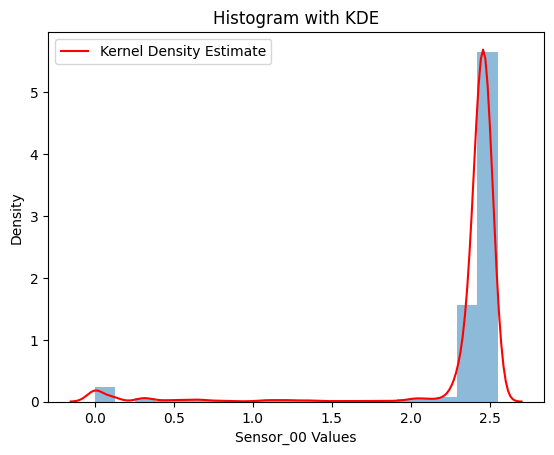

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_no_outliers is your DataFrame
plt.hist(df_no_outliers['sensor_00'], bins=20, density=True, alpha=0.5)  # 'auto' will automatically determine the number of bins
sns.kdeplot(df_no_outliers['sensor_00'], color='r', label='Kernel Density Estimate')
plt.xlabel('Sensor_00 Values')
plt.ylabel('Density')
plt.title('Histogram with KDE')
plt.legend()
plt.show()


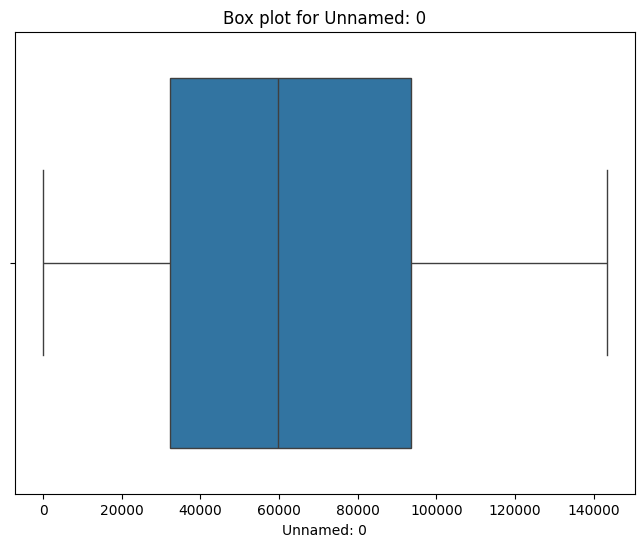

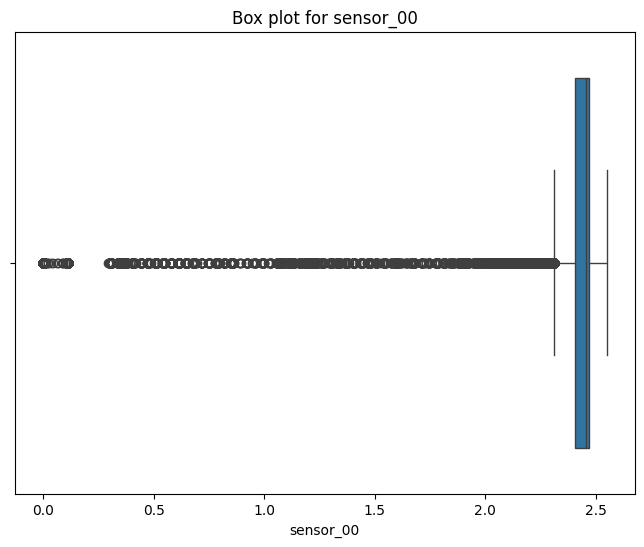

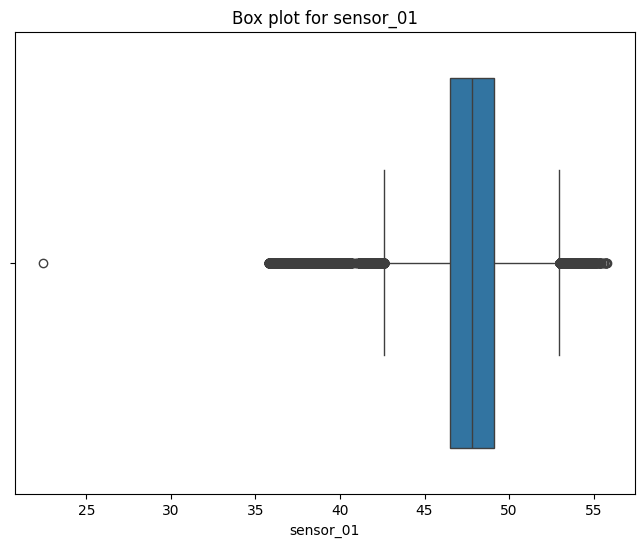

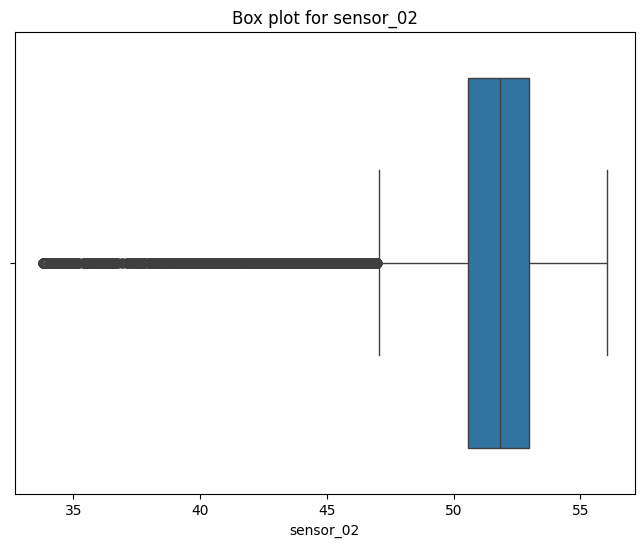

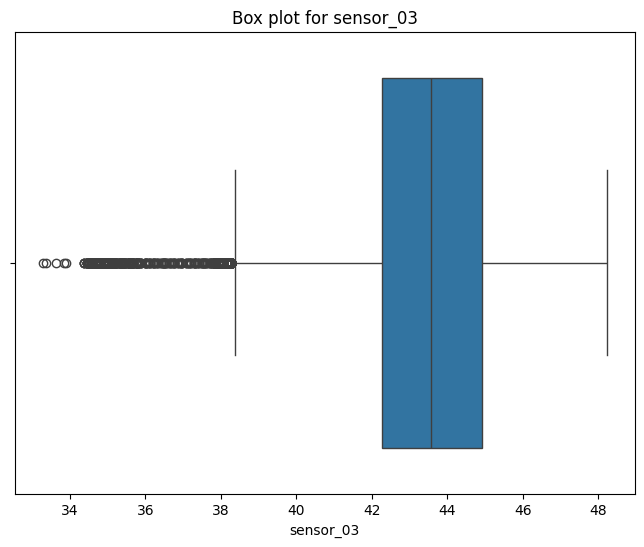

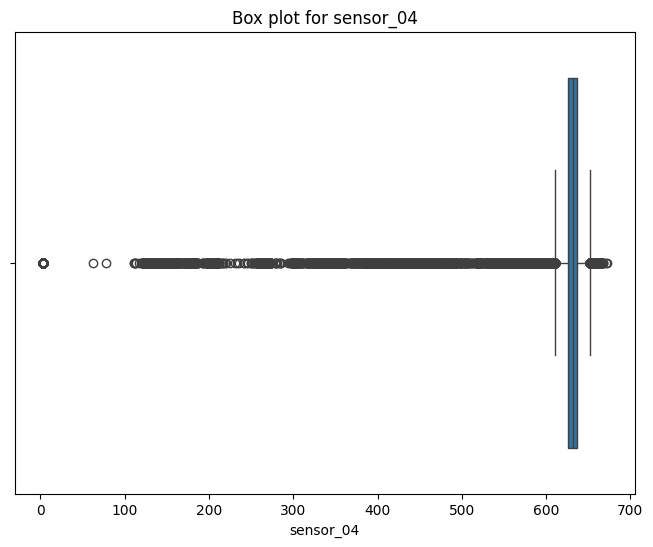

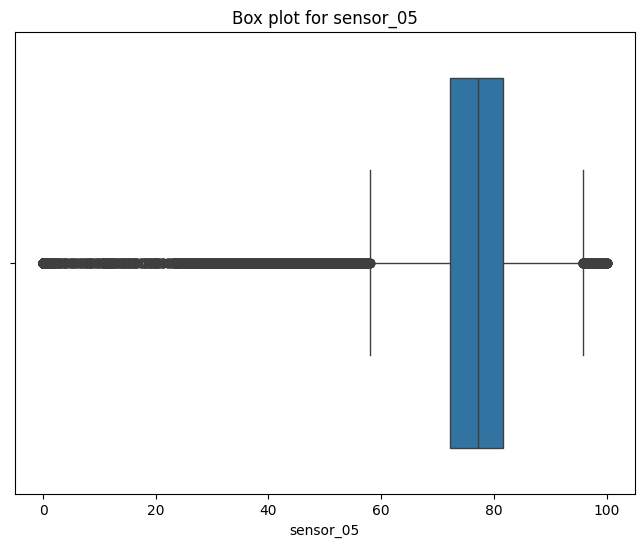

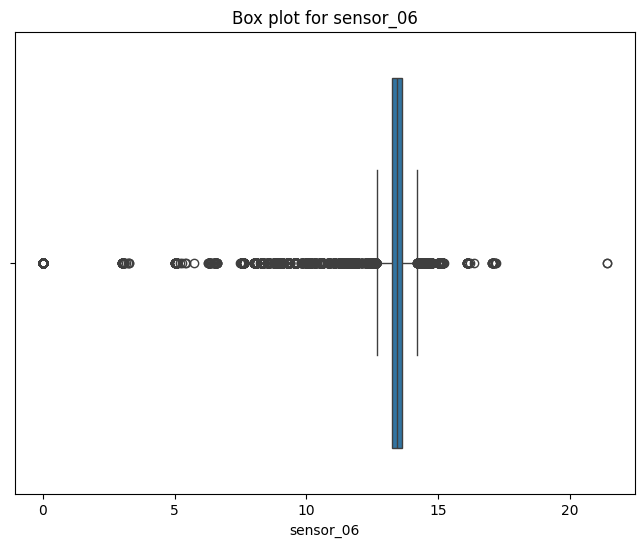

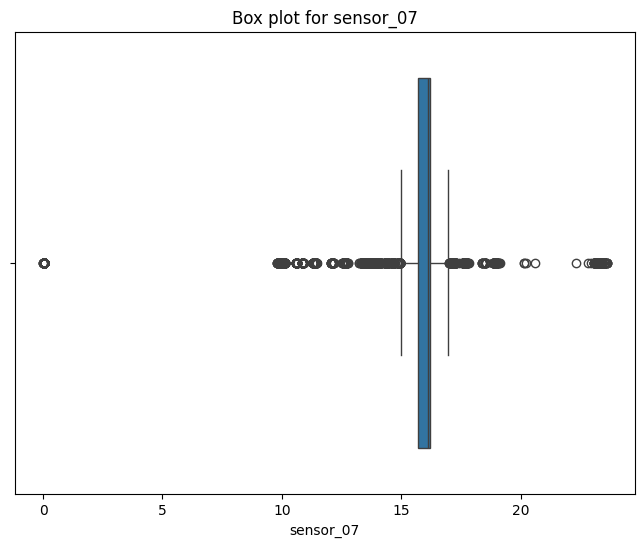

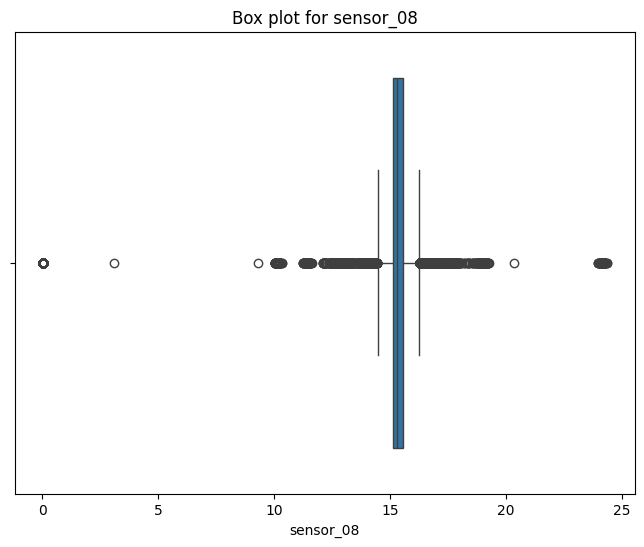

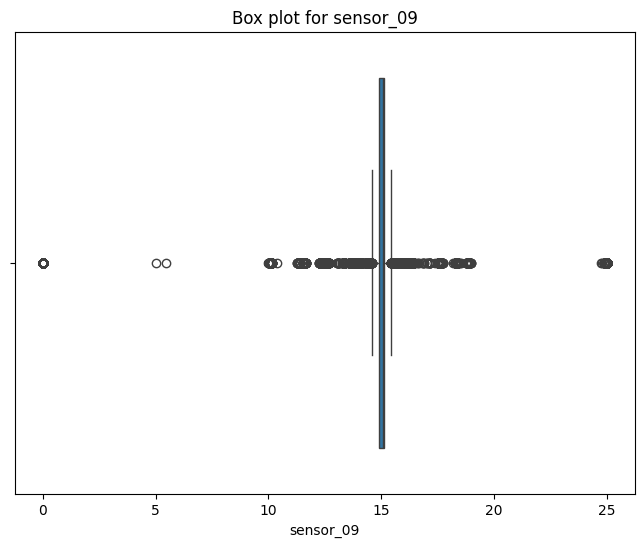

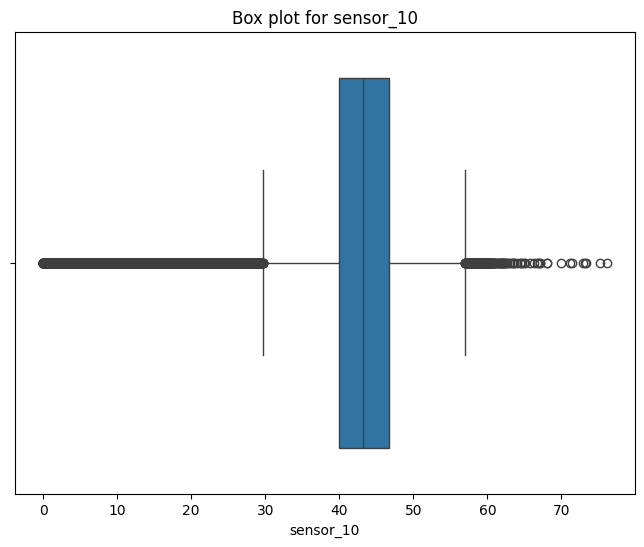

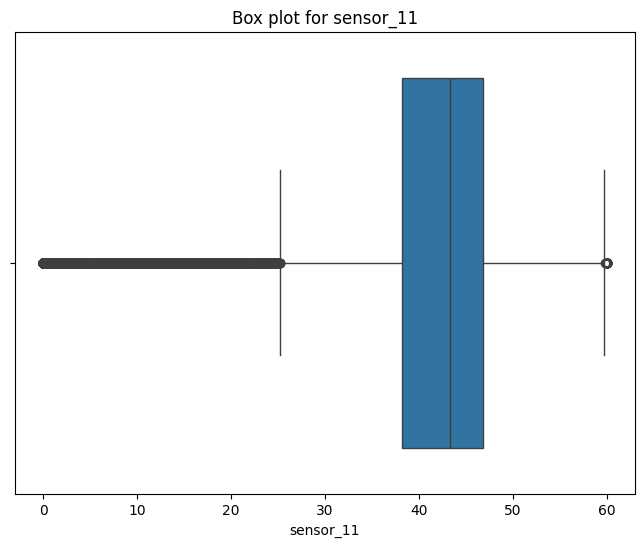

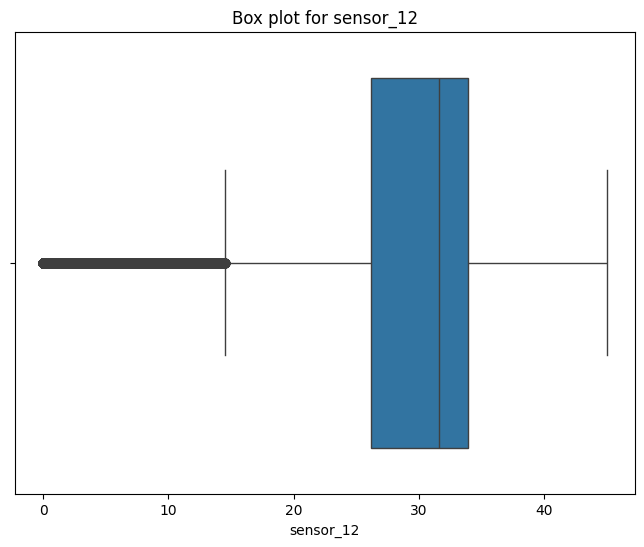

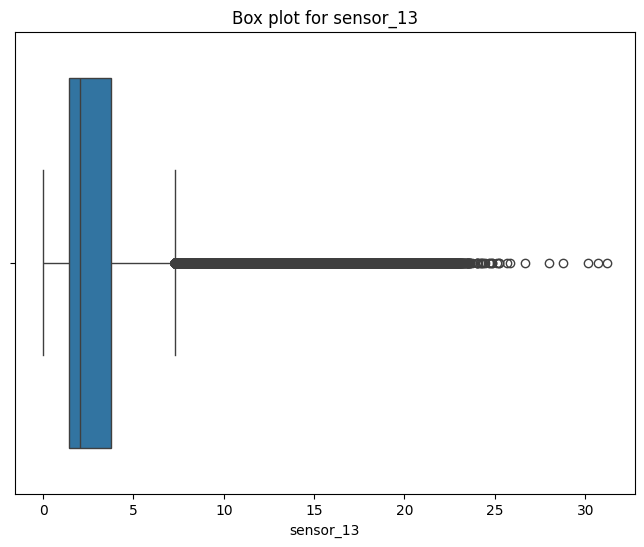

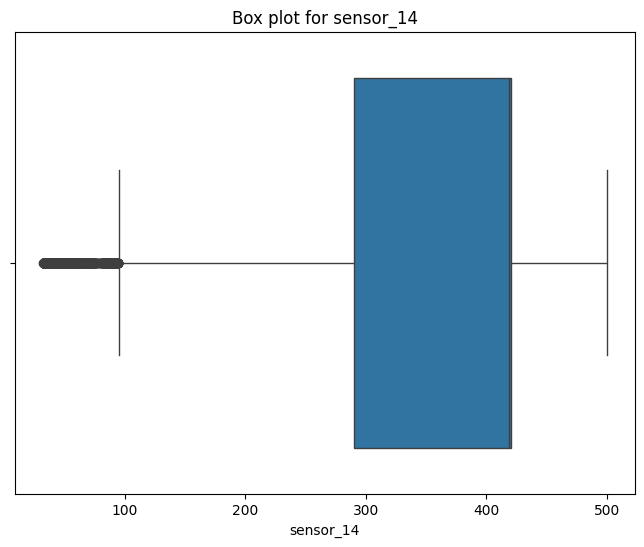

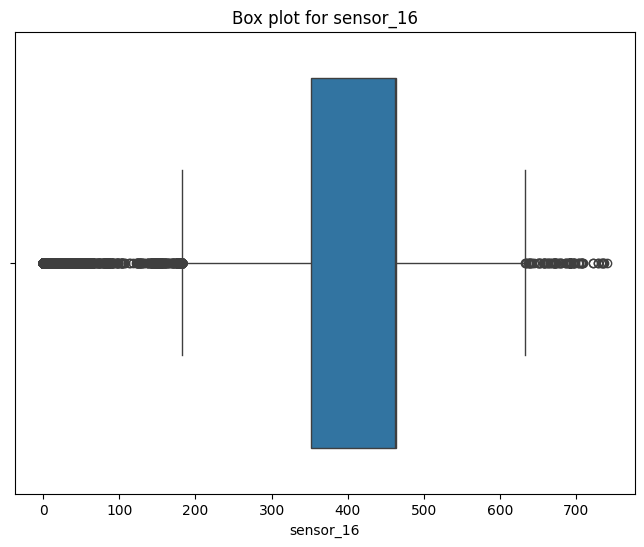

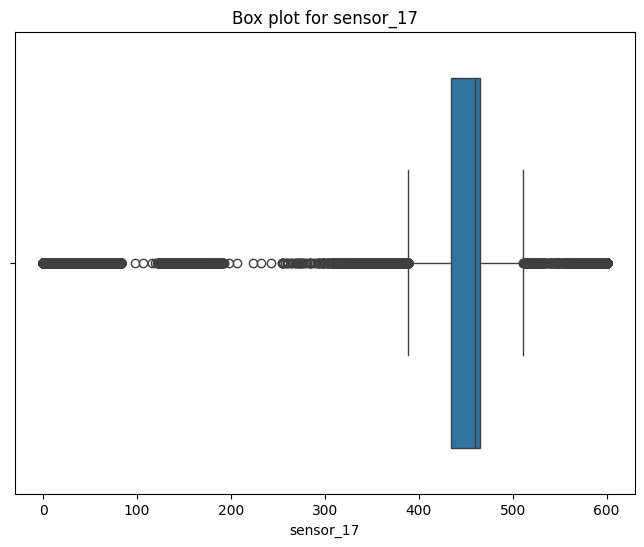

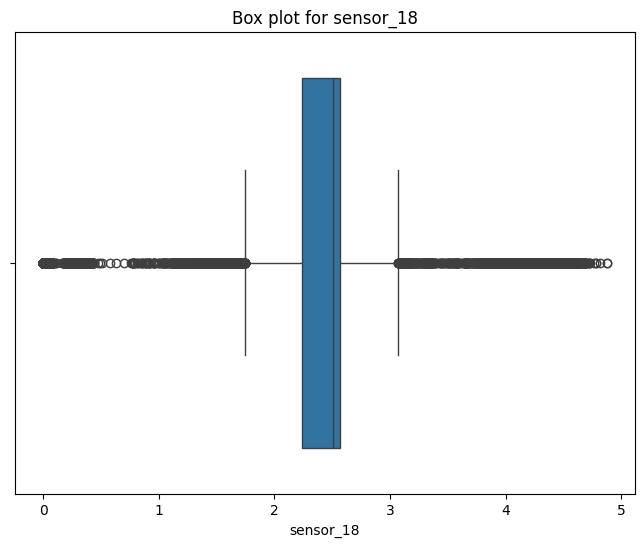

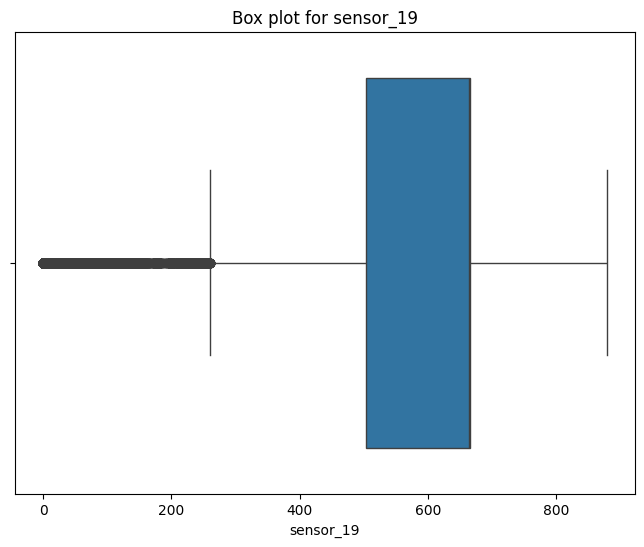

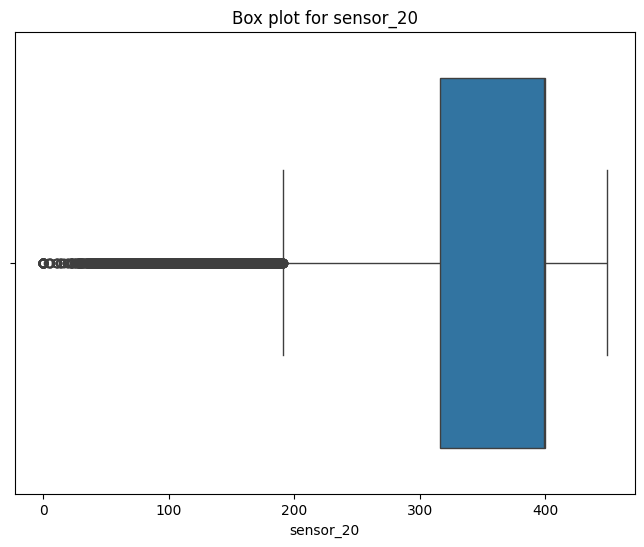

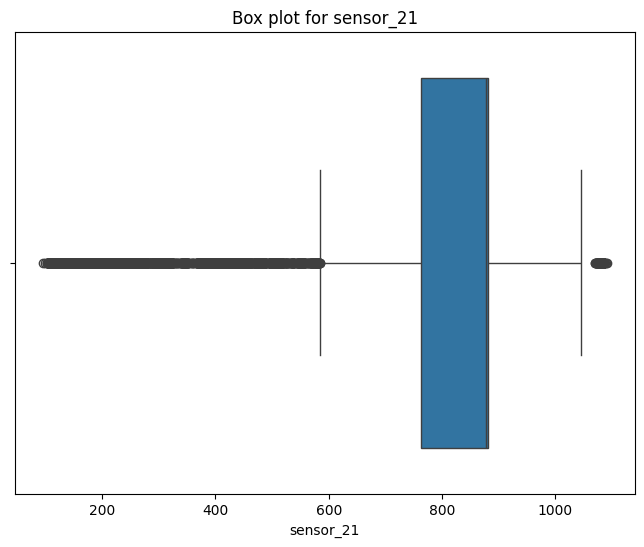

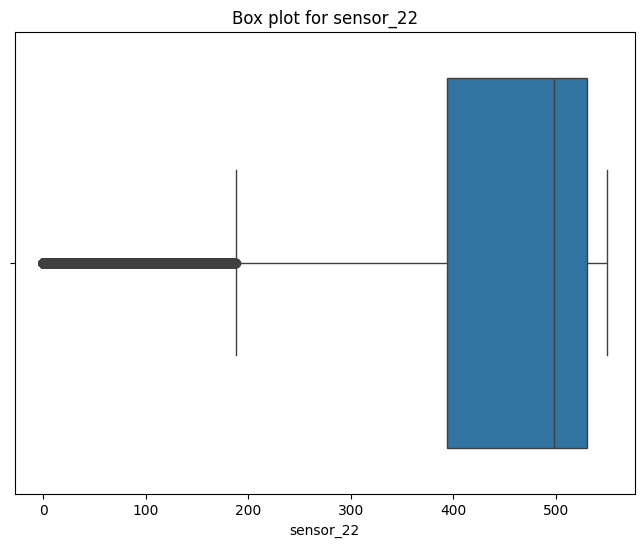

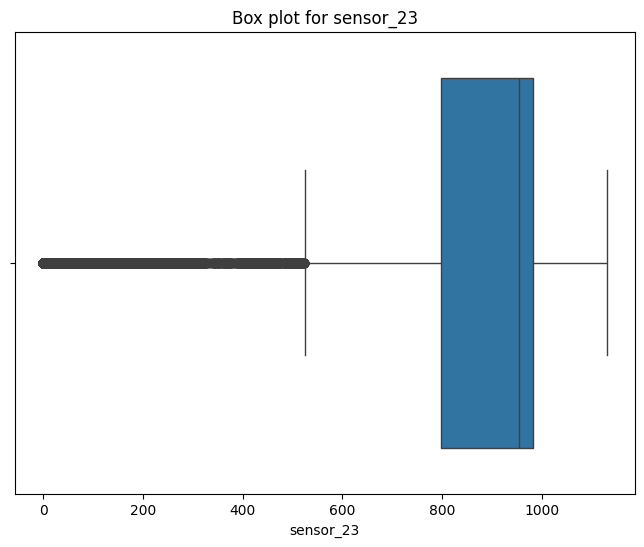

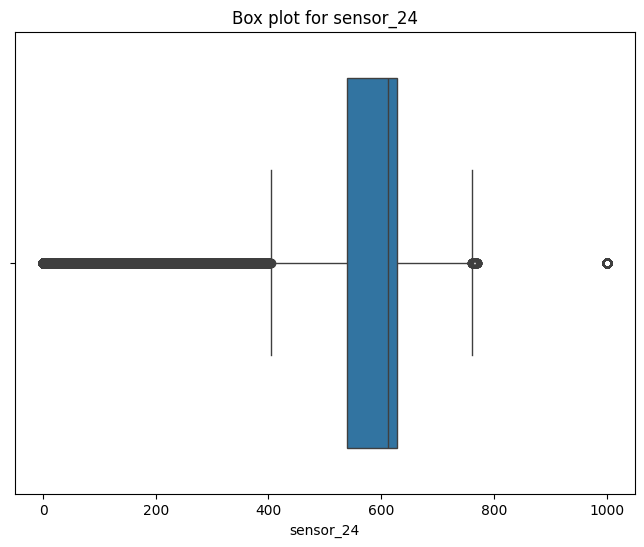

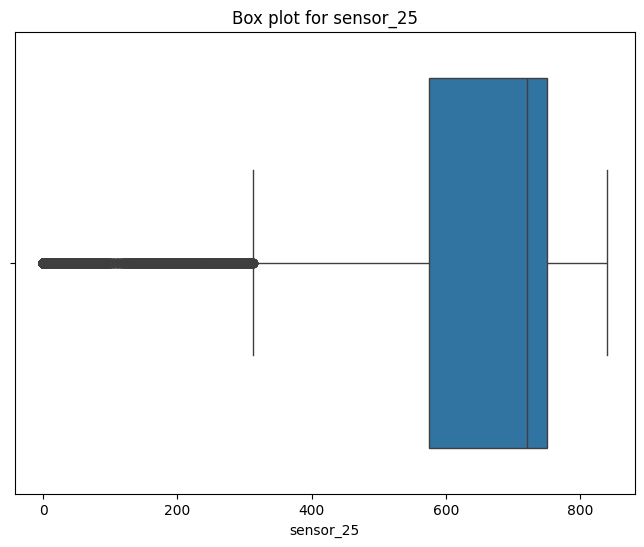

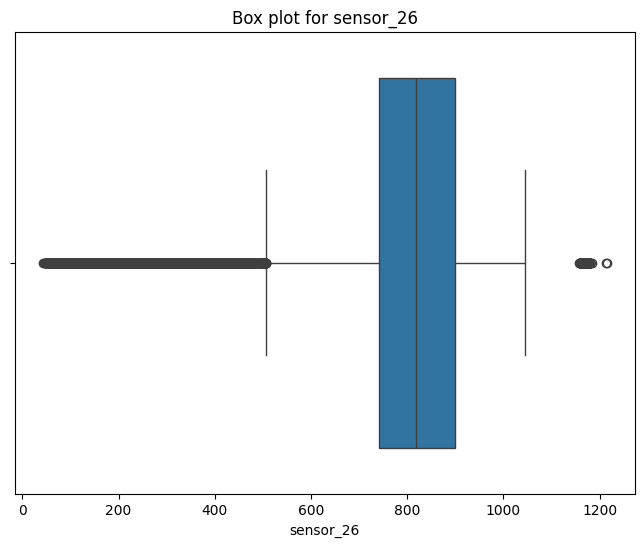

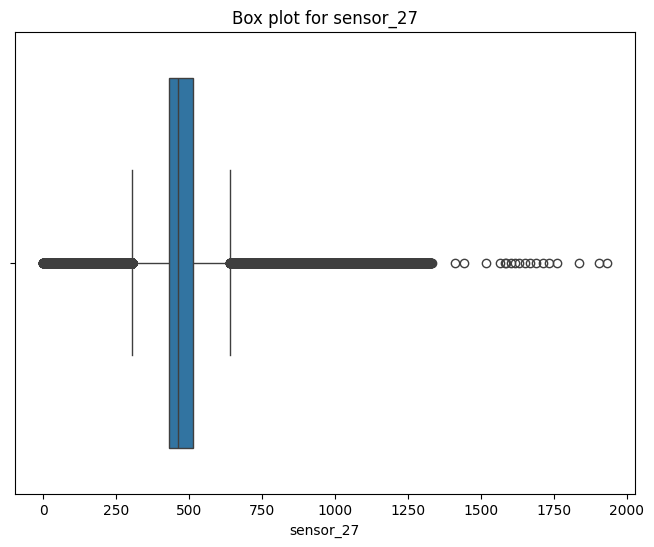

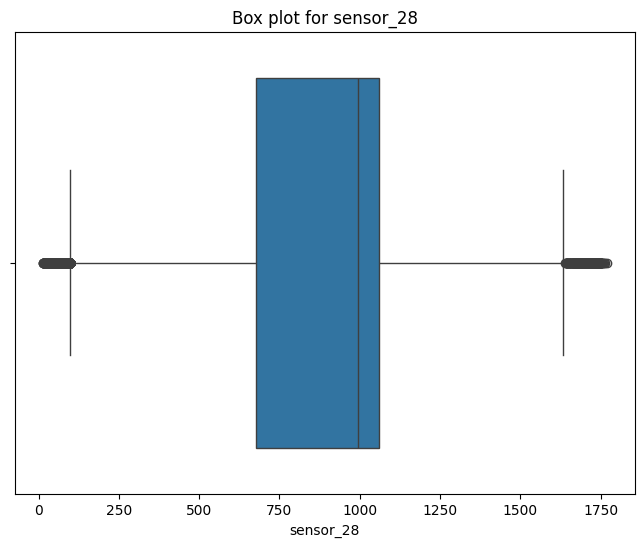

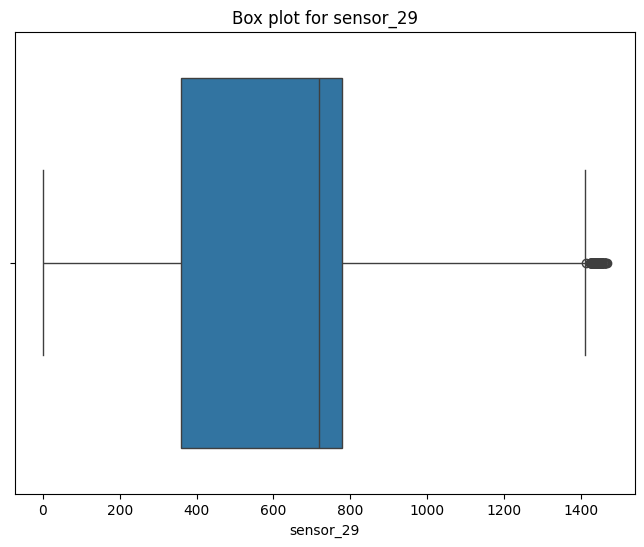

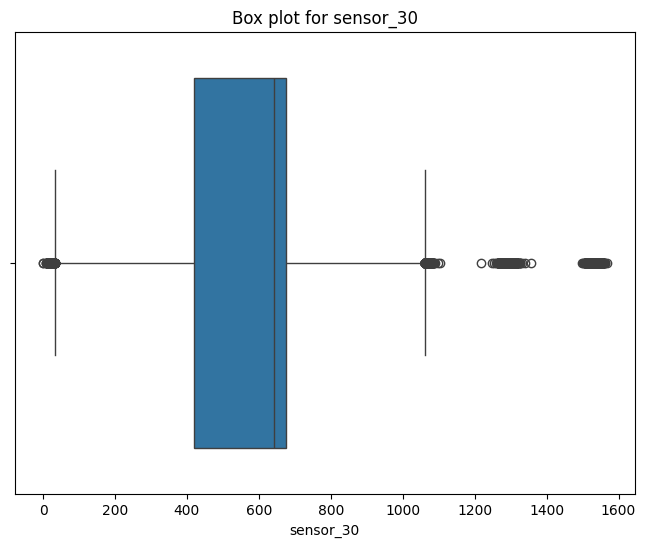

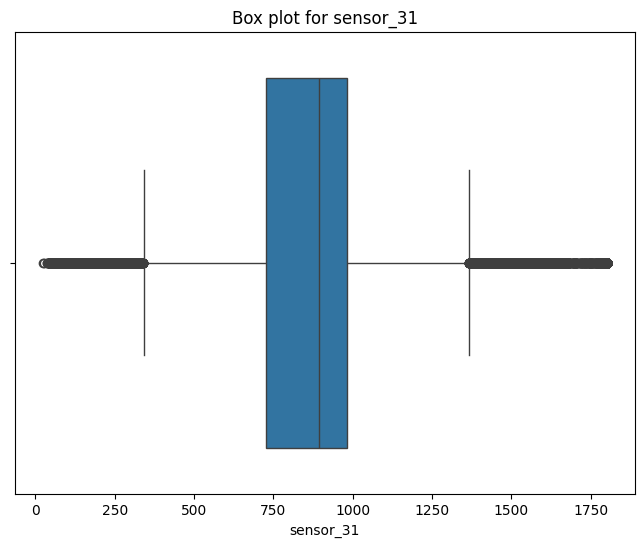

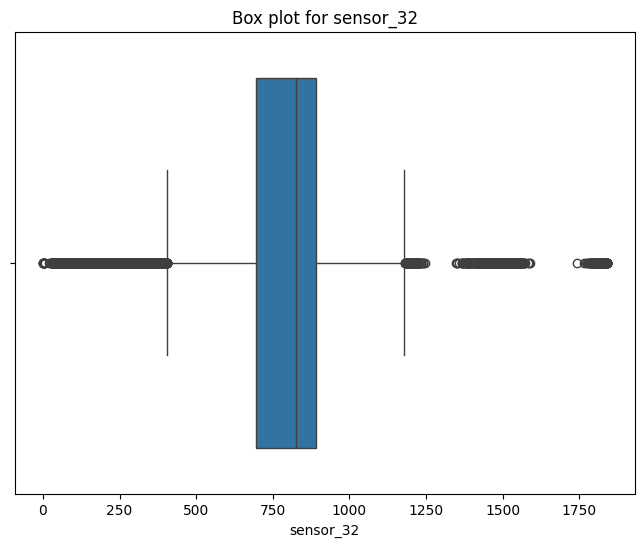

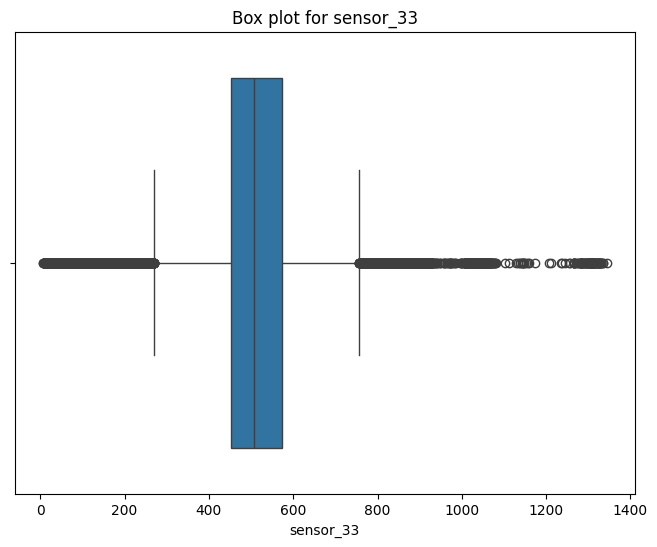

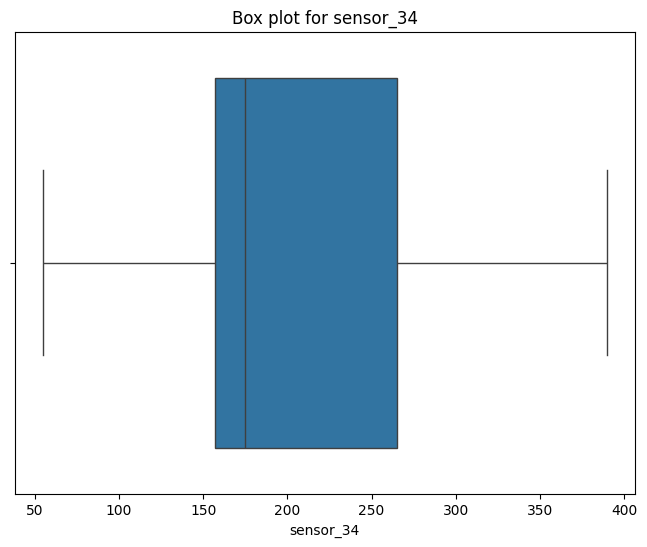

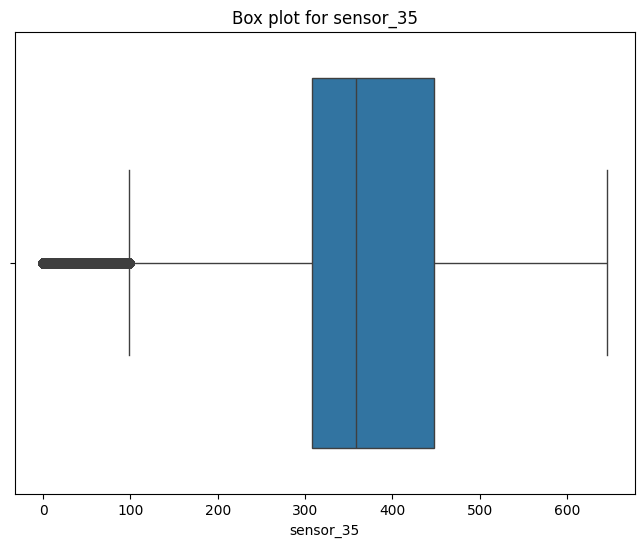

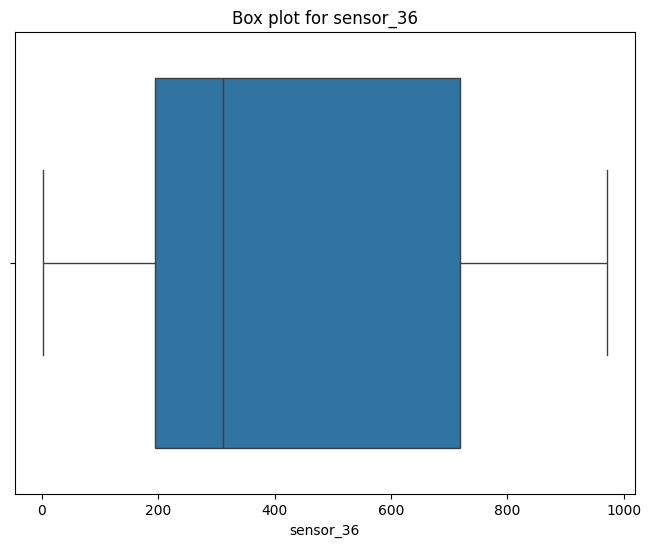

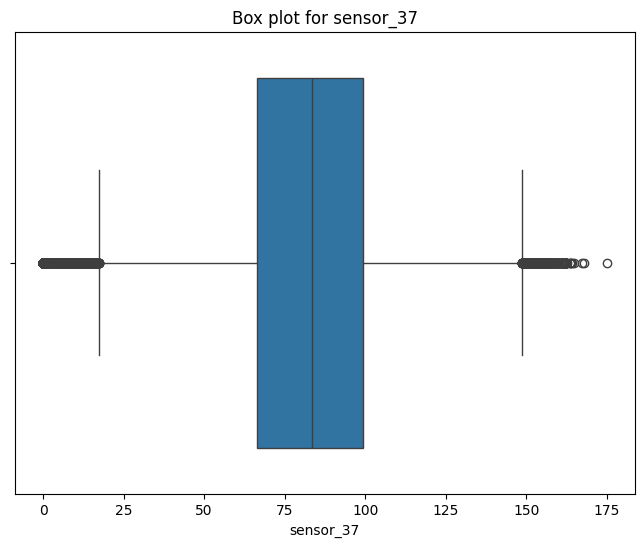

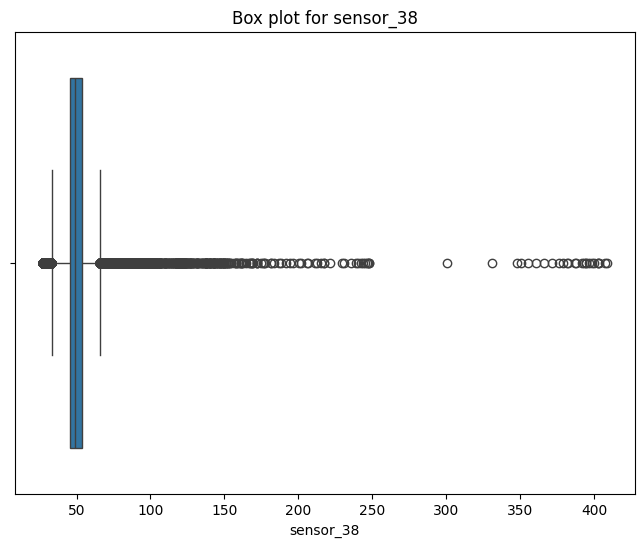

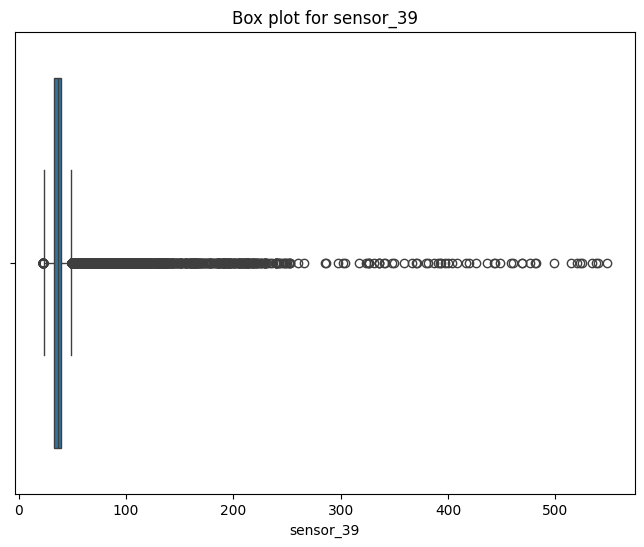

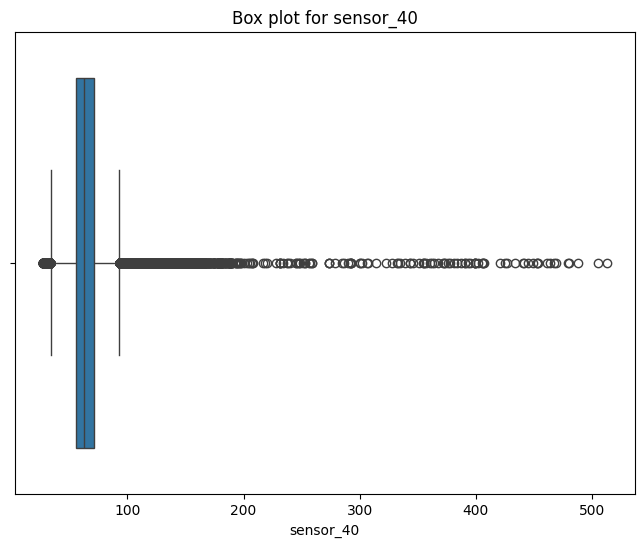

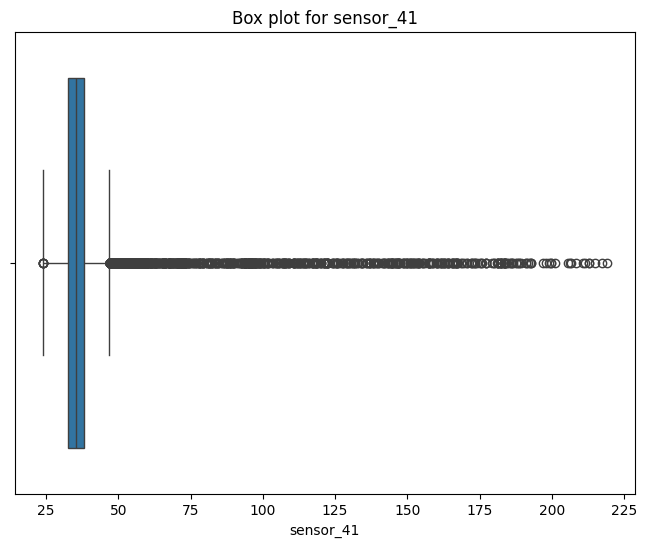

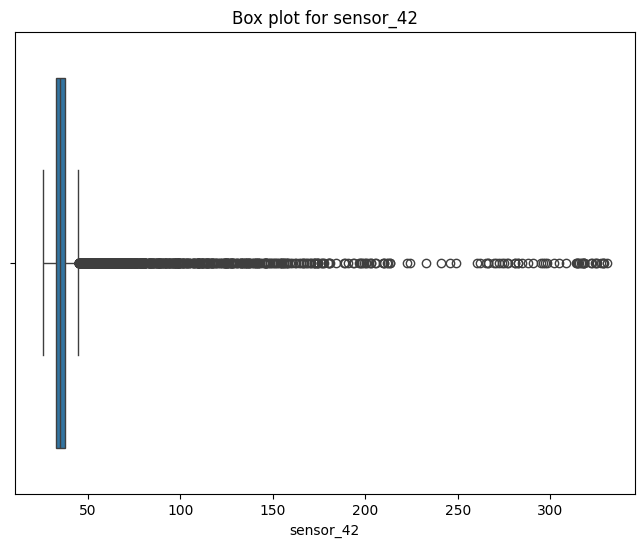

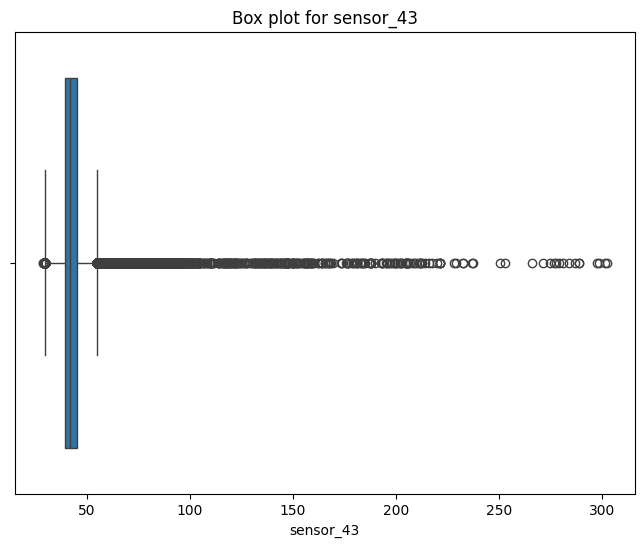

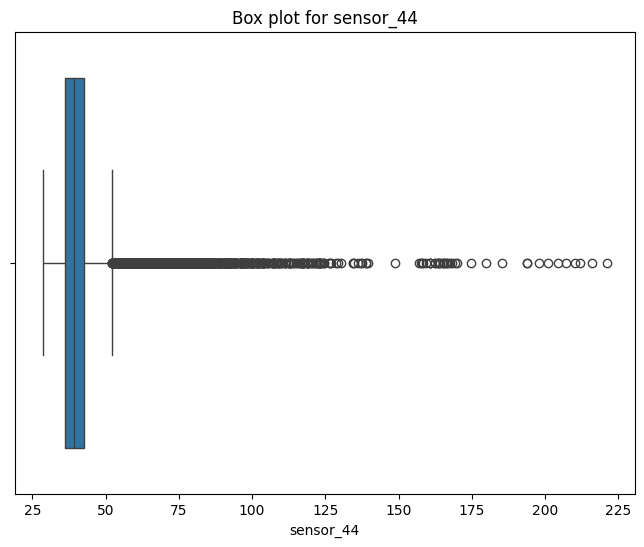

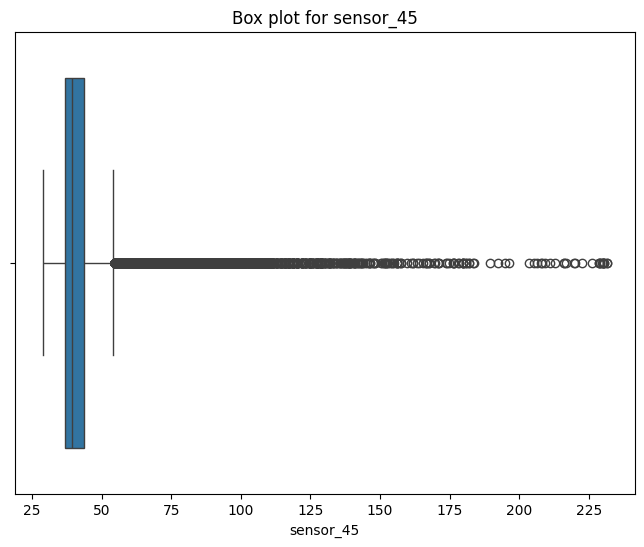

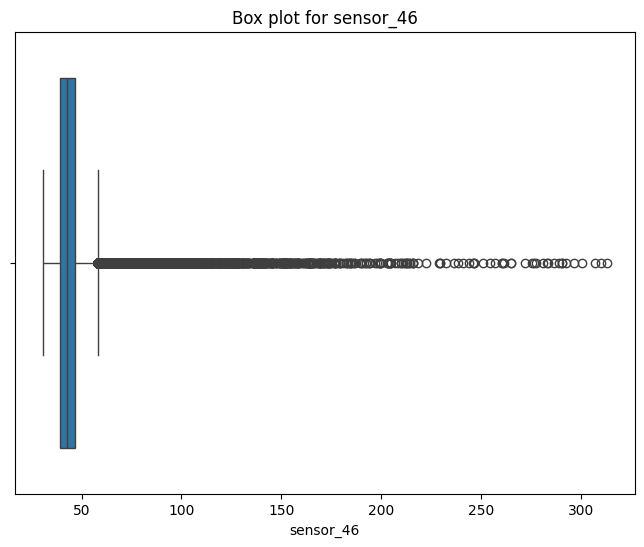

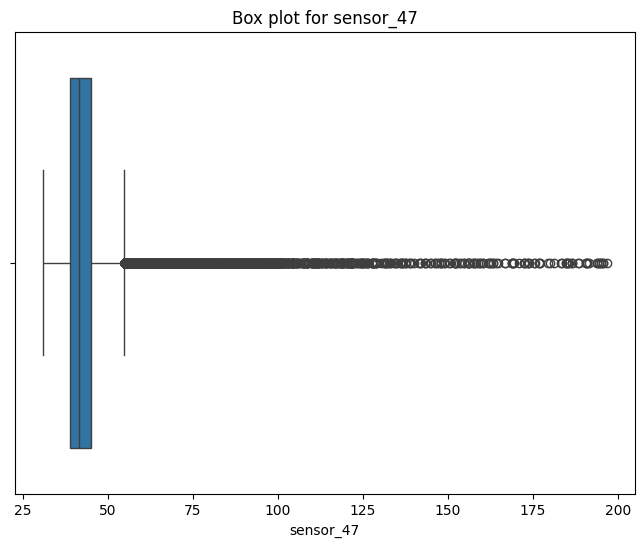

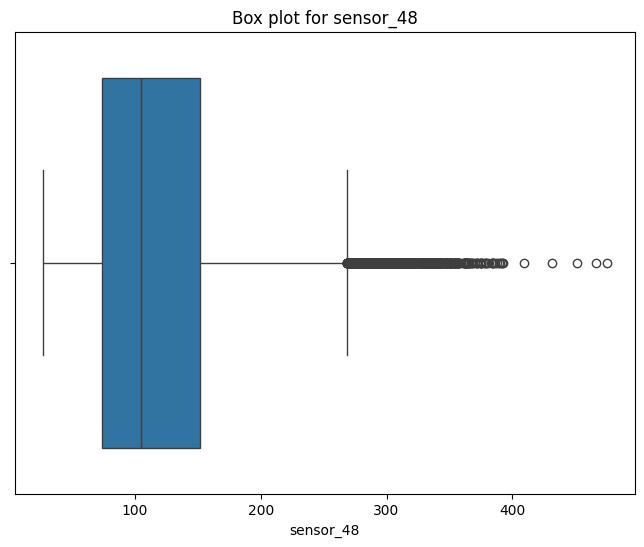

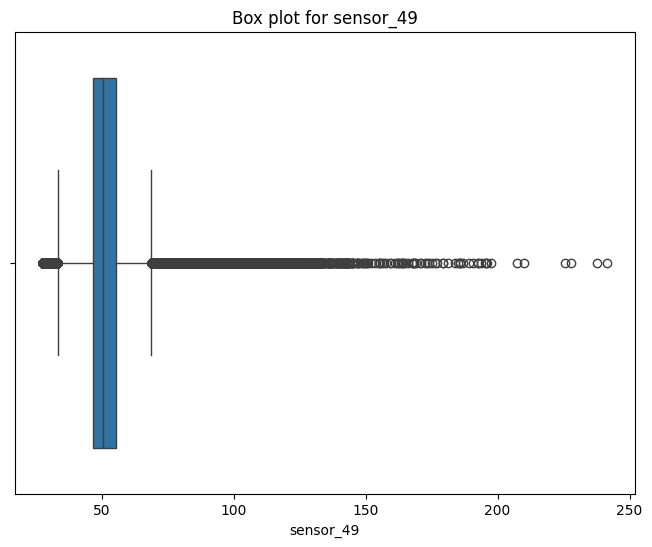

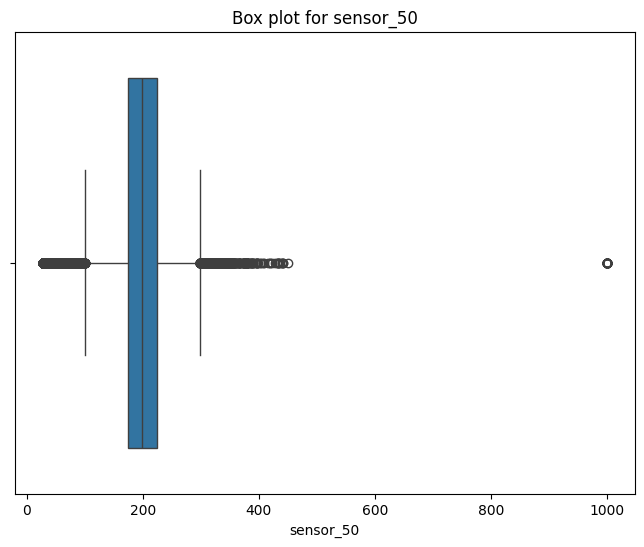

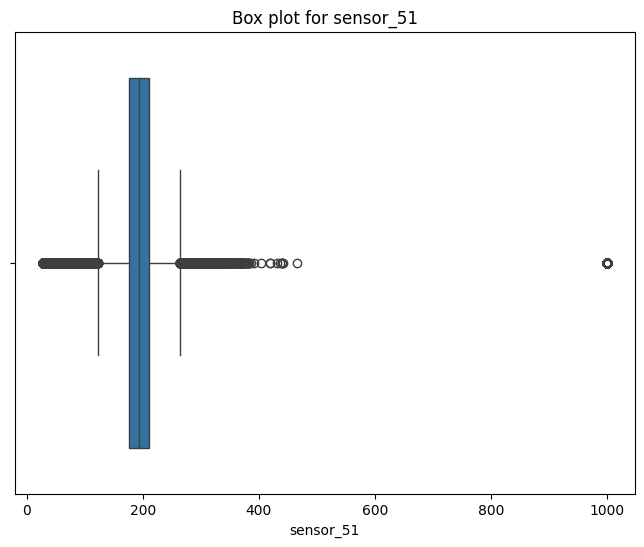

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_no_outliers is the DataFrame after removing outliers
# And df is the original DataFrame

# Choose the columns you want to visualize
columns_to_visualize = columns

# Create individual box plots for each column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f"Box plot for {column}")
    plt.show()
